## Metin Sınıflandırma

In [2]:
import pandas as pd
import nlp_Melih_Utku_BALA

In [3]:
df = pd.read_csv("data/metin_siniflandirma.csv",index_col=0)
df["Text_2"] = df["Text"].apply(nlp_Melih_Utku_BALA.pre_processing)
df["Text_2"] = df["Text_2"].apply(nlp_Melih_Utku_BALA.remove_space)
df["Text_3"] = [' '.join(wrd for wrd in x) for x in df["Text_2"]]

df_index = df[df["Text_2"].str[0].isnull()].index
df = df.drop(df_index)
df = df.reset_index()
del df["index"]
df.head()

,Text,Label,Text_2,Text_3
0,Allah'ım çıldıracağım. Yemin ederim çıldıracağ...,kızgın,"[allah, çıldıracağım, ye, eder, çıldıracak, si...",allah çıldıracağım ye eder çıldıracak sinirimd...
1,site ne zaman çalıştıda ürün stokları bitti di...,kızgın,"[si, zama, çalıştı, ür, stok, bit, diyor, mal,...",si zama çalıştı ür stok bit diyor mal oğl kand...
2,Sebebi neydi ki diye bağıracağım şimdi az kaldı,kızgın,"[sebep, di, bağıracak, kal]",sebep di bağıracak kal
3,Black friday ne amk bu yıl çıkardınız bu bokud...,kızgın,"[black, friday, amk, yıl, çıkar, boku, mal, ne...",black friday amk yıl çıkar boku mal nesiniz
4,kısa kısa cevaplar vericeksen niye yazıyorsun ...,kızgın,"[kıs, kıs, cevap, vericek, ni, yazıyor, gerize...",kıs kıs cevap vericek ni yazıyor gerizekal


In [4]:
df.groupby("Label").size()

Label
korku      800
kızgın     799
mutlu      800
surpriz    800
üzgün      799
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
msg_train,msg_test,label_train,label_test = train_test_split(df["Text_3"].tolist(),df["Label"].tolist(),test_size=0.2,random_state=42)

In [7]:
print(len(msg_train),len(msg_test),len(label_train))

3198 800 3198


In [8]:
df_test = pd.DataFrame({"text":msg_test,"label":label_test})
df_test.groupby("label").size()

label
korku      164
kızgın     169
mutlu      160
surpriz    155
üzgün      152
dtype: int64

In [9]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
svm = Pipeline([("vect",TfidfVectorizer()),("svm",LinearSVC())])

In [12]:
svm.fit(msg_train,label_train)
y_pred_class = svm.predict(msg_test)

In [21]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [22]:
print("svm accuary score :", accuracy_score(label_test,y_pred_class))

svm accuary score : 0.98


In [23]:
print("svm f1 score :", f1_score(label_test,y_pred_class,average="weighted"))

svm f1 score : 0.9800012002533918


In [24]:
len(label_test)

800

In [25]:
800*0.98

784.0

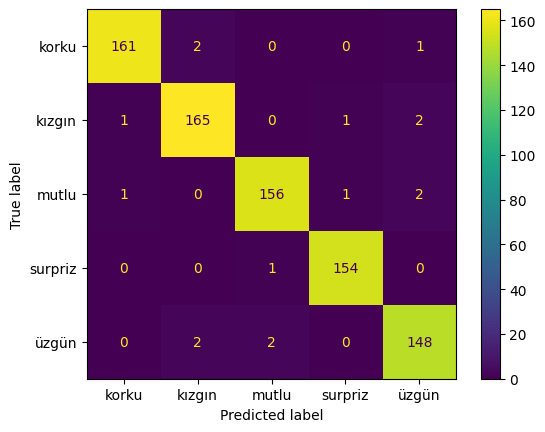

In [27]:
cm = confusion_matrix(label_test,y_pred_class,labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm.classes_)
disp.plot()

In [35]:
from gensim.models import Word2Vec

In [36]:
model = Word2Vec.load("data/word2vec.model")
model.build_vocab(df["Text_2"].tolist(),update=True)
model.save("data/word2vec.model")

In [34]:
df["word2vec"] = df["Text_2"].apply(nlp_Melih_Utku_BALA.word2vec)

In [37]:
df.head()

,Text,Label,Text_2,Text_3,word2vec
0,Allah'ım çıldıracağım. Yemin ederim çıldıracağ...,kızgın,"[allah, çıldıracağım, ye, eder, çıldıracak, si...",allah çıldıracağım ye eder çıldıracak sinirimd...,"[-0.003981809131801128, 0.017307482659816742, ..."
1,site ne zaman çalıştıda ürün stokları bitti di...,kızgın,"[si, zama, çalıştı, ür, stok, bit, diyor, mal,...",si zama çalıştı ür stok bit diyor mal oğl kand...,"[-0.0035983086563646793, 0.009379255585372448,..."
2,Sebebi neydi ki diye bağıracağım şimdi az kaldı,kızgın,"[sebep, di, bağıracak, kal]",sebep di bağıracak kal,"[-0.008350715972483158, 0.010193136520683765, ..."
3,Black friday ne amk bu yıl çıkardınız bu bokud...,kızgın,"[black, friday, amk, yıl, çıkar, boku, mal, ne...",black friday amk yıl çıkar boku mal nesiniz,"[-0.0008934943471103907, 0.008480808697640896,..."
4,kısa kısa cevaplar vericeksen niye yazıyorsun ...,kızgın,"[kıs, kıs, cevap, vericek, ni, yazıyor, gerize...",kıs kıs cevap vericek ni yazıyor gerizekal,"[-0.008955701254308224, 0.012521868571639061, ..."


In [39]:
msg_train,msg_test,label_train,label_test = train_test_split(df["word2vec"].tolist(),df["Label"].tolist(),test_size=0.2,random_state=42)
svm = Pipeline([("svm",LinearSVC())])
svm.fit(msg_train,label_train)
y_pred_class = svm.predict(msg_test)

print("svm accuary score :", accuracy_score(label_test,y_pred_class))
print("svm f1 score :", f1_score(label_test,y_pred_class,average="weighted"))

svm accuary score : 0.48125
svm f1 score : 0.4830725367290038


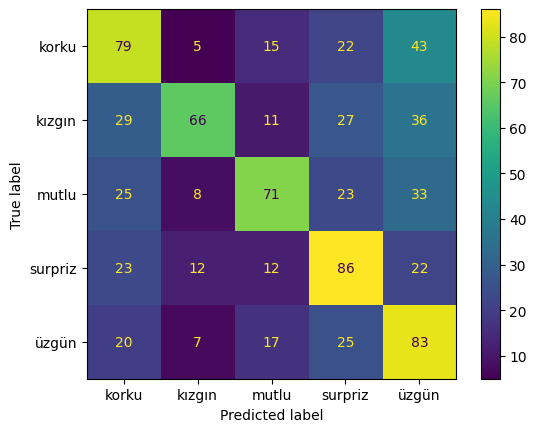

In [40]:
cm = confusion_matrix(label_test,y_pred_class,labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm.classes_)
disp.plot()

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
msg_train,msg_test,label_train,label_test = train_test_split(df["Text_3"].tolist(),df["Label"].tolist(),test_size=0.2,random_state=42)
knn = Pipeline([("vect",TfidfVectorizer()),("knn",KNeighborsClassifier())])
knn.fit(msg_train,label_train)
y_pred_class = knn.predict(msg_test)

print("knn accuary score :", accuracy_score(label_test,y_pred_class))
print("knn f1 score :", f1_score(label_test,y_pred_class,average="weighted"))

knn accuary score : 0.78875
knn f1 score : 0.7887810164274779


In [44]:
len(msg_test)

800

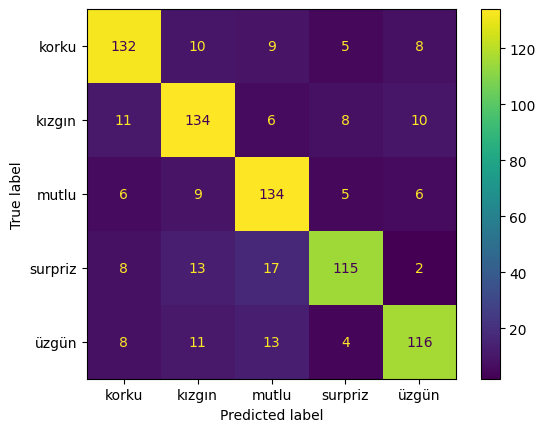

In [45]:
cm = confusion_matrix(label_test,y_pred_class,labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm.classes_)
disp.plot()

In [46]:
msg_train,msg_test,label_train,label_test = train_test_split(df["word2vec"].tolist(),df["Label"].tolist(),test_size=0.2,random_state=42)
knn = Pipeline([("knn",KNeighborsClassifier())])
knn.fit(msg_train,label_train)
y_pred_class = knn.predict(msg_test)

print("knn accuary score :", accuracy_score(label_test,y_pred_class))
print("knn f1 score :", f1_score(label_test,y_pred_class,average="weighted"))

knn accuary score : 0.3575
knn f1 score : 0.3410346396505098
